In [49]:
# Imports
import pandas as pd
import numpy as np 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler 
from sklearn.datasets import load_iris
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
iris = load_iris() 
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Part 1

In [4]:
# 1.1

df = pd.DataFrame({'A': [0,0,0,0,0,1,1],
 'B': [1,2,3,5,4,2,5],
 'C': [5,3,4,1,1,2,3]})
a_group_desc = df.groupby('B').describe()
unstacked = a_group_desc.unstack()
print(unstacked)

          B
A  count  1    1.0
          2    2.0
          3    1.0
          4    1.0
          5    2.0
              ... 
C  max    1    5.0
          2    3.0
          3    4.0
          4    1.0
          5    3.0
Length: 80, dtype: float64


In [5]:
# Qst 1:


In [6]:
# 1.2

# Exemple de jeu de données
data = {
 'Nom': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob'],
 'Age': [25, 30, 35, 25, 30],
 'Ville': ['Paris', 'Lyon', 'Marseille', 'Paris', 'Lyon']
}
# Création d'un DataFrame
df = pd.DataFrame(data)
# Affichage du DataFrame original
print("DataFrame original :")
print(df)
db = df.duplicated()
print(df[db])
df_new = df.drop_duplicates()
print(df_new) 

DataFrame original :
       Nom  Age      Ville
0    Alice   25      Paris
1      Bob   30       Lyon
2  Charlie   35  Marseille
3    Alice   25      Paris
4      Bob   30       Lyon
     Nom  Age  Ville
3  Alice   25  Paris
4    Bob   30   Lyon
       Nom  Age      Ville
0    Alice   25      Paris
1      Bob   30       Lyon
2  Charlie   35  Marseille


In [7]:
# Qst 2
# a)
# b)

In [10]:
# 1.3

s = pd.Series([1, 2, 3, np.NaN, 5, 6, None])
print("Visualiser les données manquantes : true means a detection of a missing data")
print (s.isnull())
print ("Isoler les données manquantes")
print(s[s.isnull()])
print(s.fillna(int(s.mean())))
print(s.dropna())

Visualiser les données manquantes : true means a detection of a missing data
0    False
1    False
2    False
3     True
4    False
5    False
6     True
dtype: bool
Isoler les données manquantes
3   NaN
6   NaN
dtype: float64
0    1.0
1    2.0
2    3.0
3    3.0
4    5.0
5    6.0
6    3.0
dtype: float64
0    1.0
1    2.0
2    3.0
4    5.0
5    6.0
dtype: float64


In [11]:
# Qst 3


In [22]:
# 1.4

# Create an empty dataset
df = pd.DataFrame()
# Create two variables called x0 and x1. Make the first value of x1 a missing value
df['x0'] = [0.3051,0.4949,0.6974,0.3769,0.2231,0.341,0.4436,0.5897,0.6308,0.5]
df['x1'] = [np.nan,0.2654,0.2615,0.5846,0.4615,0.8308,0.4962,0.3269,0.5346,0.6731]
# View the dataset
print("Data :")
print(df)
# Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature
print("chercher les valeurs manquantes par la moyenne de la colonne")
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Apply the imputor on the df dataset
mean_imputer = mean_imputer.fit(df)
imputed_data = mean_imputer.transform(df)
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)
# View the dataset
print("data après imputation")
print(imputed_df)

Data :
       x0      x1
0  0.3051     NaN
1  0.4949  0.2654
2  0.6974  0.2615
3  0.3769  0.5846
4  0.2231  0.4615
5  0.3410  0.8308
6  0.4436  0.4962
7  0.5897  0.3269
8  0.6308  0.5346
9  0.5000  0.6731
chercher les valeurs manquantes par la moyenne de la colonne
data après imputation
       x0        x1
0  0.3051  0.492733
1  0.4949  0.265400
2  0.6974  0.261500
3  0.3769  0.584600
4  0.2231  0.461500
5  0.3410  0.830800
6  0.4436  0.496200
7  0.5897  0.326900
8  0.6308  0.534600
9  0.5000  0.673100


In [23]:
# Qst 4


In [27]:
# 1.5

df = pd.DataFrame({'A': [2,1,2,3,3,5,4],'B': [1,2,3,5,4,2,5], 'C': [5,3,4,1,1,2,3]})
print(df)
print("Le jeu de données est trié selon la colonne 'A'")
df = df.sort_values(by=['A'], ascending=[True])
df = df.reset_index(drop=True)
print (df)
index = df.index.tolist()
np.random.shuffle(index)
df = df.loc[index]
df = df.reset_index(drop=True)
print("Le jeu de données est mélangé")
print (df) 

   A  B  C
0  2  1  5
1  1  2  3
2  2  3  4
3  3  5  1
4  3  4  1
5  5  2  2
6  4  5  3
Le jeu de données est trié selon la colonne 'A'
   A  B  C
0  1  2  3
1  2  1  5
2  2  3  4
3  3  5  1
4  3  4  1
5  4  5  3
6  5  2  2
Le jeu de données est mélangé
   A  B  C
0  3  5  1
1  3  4  1
2  4  5  3
3  2  3  4
4  2  1  5
5  5  2  2
6  1  2  3


In [29]:
# Qst 


In [34]:
# 2

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data'
names= ['constructor','Model','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']

dataset = pd.read_csv(url, names=names)
print("data:")
print(dataset)

# MIN MAX SCALING
minmax_scale = MinMaxScaler().fit(dataset[['MYCT', 'MMAX']])
df_minmax = minmax_scale.transform(dataset[['MYCT', 'MMAX']])

print('\n********** Normalisation*********\n')

print('Moyenne apres le Min max Scaling :\nMYCT={:.2f}, MMAX={:.2f}'
.format(df_minmax[:,0].mean(), df_minmax[:,1].mean()))

print('\n')

print('Valeur minimale et maximale pour la feature MYCT apres min max scaling: \nMIN={:.2f}, MAX={:.2f}'.format(df_minmax[:,0].min(), df_minmax[:,0].max()))

print('\n')

print('Valeur minimale et maximale pour la feature MMAX apres min max scaling : \nMIN={:.2f}, MAX={:.2f}'.format(df_minmax[:,1].min(), df_minmax[:,1].max()))
print("data après normalisation")
print(df_minmax)

data:
    constructor          Model  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  \
0       adviser          32/60   125   256   6000   256     16    128  198   
1        amdahl         470v/7    29  8000  32000    32      8     32  269   
2        amdahl        470v/7a    29  8000  32000    32      8     32  220   
3        amdahl        470v/7b    29  8000  32000    32      8     32  172   
4        amdahl        470v/7c    29  8000  16000    32      8     16  132   
..          ...            ...   ...   ...    ...   ...    ...    ...  ...   
204      sperry           80/8   124  1000   8000     0      1      8   42   
205      sperry  90/80-model-3    98  1000   8000    32      2      8   46   
206      sratus             32   125  2000   8000     0      2     14   52   
207        wang         vs-100   480   512   8000    32      0      0   67   
208        wang          vs-90   480  1000   4000     0      0      0   45   

     ERP  
0    199  
1    253  
2    253  
3    253  
4 

In [38]:
# 3

df = pd.DataFrame({'Map': [0,0,0,1,1,2,2], 'Values': [1,2,3,5,4,2,5]})
df['Sum'] = df.groupby('Map')['Values'].transform('sum')
df['Moy'] = df.groupby('Map')['Values'].transform('mean')
print(df) 

   Map  Values  Sum  Moy
0    0       1    6  2.0
1    0       2    6  2.0
2    0       3    6  2.0
3    1       5    9  4.5
4    1       4    9  4.5
5    2       2    7  3.5
6    2       5    7  3.5


In [39]:
# Qst 6


In [42]:
# 4

iris_nparray = iris.data
iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_dataframe['group'] = pd.Series([iris.target_names[k] for k in iris.target], dtype="category")
print("IRIS data values:")
print(iris_dataframe)
print("Mean value :")
print (iris_dataframe.mean(numeric_only=True))
print("Median value :")
print (iris_dataframe.median(numeric_only=True))
numerical_columns = iris_dataframe.select_dtypes(include=[np.number])
print("Discrétisation basée sur des effectifs égaux (ou quantiles) :")
print(numerical_columns.quantile(np.array([0,.25,.50,.75,1])))
#Le binning transforme les variables numériques en variables catégoriques
iris_binned = pd.concat([
 pd.qcut(iris_dataframe.iloc[:,0], [0, .25, .5, .75, 1]),
 pd.qcut(iris_dataframe.iloc[:,1], [0, .25, .5, .75, 1]),
 pd.qcut(iris_dataframe.iloc[:,2], [0, .25, .5, .75, 1]),
 pd.qcut(iris_dataframe.iloc[:,3], [0, .25, .5, .75, 1]),
 ], join='outer', axis = 1)
print("Bining IrisData")
print(iris_binned)
#obtenir une fréquence pour chaque variable catégorique de l'ensemble de données
print("Fréquence dans chanque catégorie")
print (iris_dataframe['group'].value_counts())
print("Fréquence pour chaque marge de valeurs")
print (iris_binned['petal length (cm)'].value_counts()) 


IRIS data values:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         

In [43]:
# Qst 7


In [44]:
# Part 2

Les scores de corrélation des features :
chi2 score  [ 10.81782088   3.7107283  116.31261309  67.0483602 ]
F - score score  [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
mutual info  [0.50873681 0.26154715 0.98825497 0.99196455]


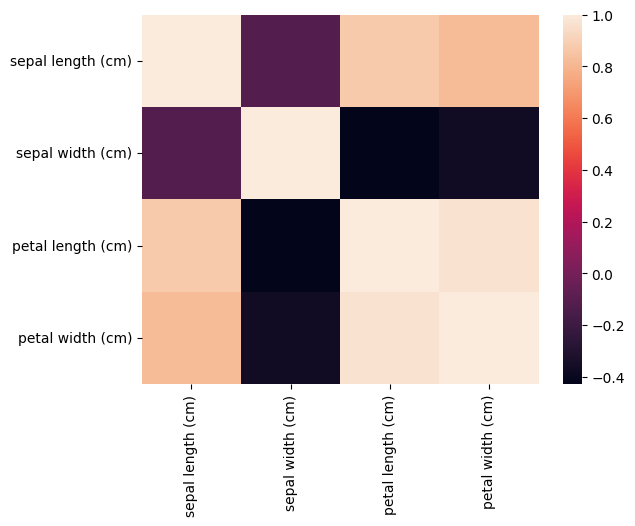

In [47]:
# 1

X,y = iris.data, iris.target
chi2_score, chi_2_p_value = chi2(X,y)
f_score, f_p_value = f_classif(X,y)
mut_info_score = mutual_info_classif(X,y)
print("Les scores de corrélation des features :")
print('chi2 score ', chi2_score)
print('F - score score ', f_score)
print('mutual info ', mut_info_score)
dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
corr = dataframe.corr()
sns.heatmap(corr,
 xticklabels=corr.columns.values,
 yticklabels=corr.columns.values)
plt.show()

In [48]:
# Qst 8


In [ ]:
# 2

# Charger un jeu de données Iris
data = load_iris()
X = data.data # Caractéristiques
y = data.target # Étiquettes
# Étape 1 : Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Étape 2 : Appliquer la PCA
pca = PCA(n_components=2) # Choisir le nombre de composantes
principales
X_pca = pca.fit_transform(X_scaled)
# Étape 3 : Afficher la variance expliquée par chaque composante
print("Variance expliquée par chaque composante :",
pca.explained_variance_ratio_)
# Étape 4 : Convertir en DataFrame pour visualiser les nouvelles
caractéristiques
df_pca = pd.DataFrame(X_pca, columns=['Composante 1', 'Composante 2'])
df_pca['Classe'] = y
print(df_pca.head())
#plot graphique d’observation des données
with plt.style.context('seaborn-v0_8-whitegrid'):
 plt.figure(figsize=(6, 4))
 for lab, col in zip((0, 1, 2),
 ('blue', 'red', 'green')):
 plt.scatter(X_pca[y==lab, 0],
 X_pca[y==lab, 1],
 label=lab,
 c=col)
 plt.xlabel('Principal Component 1')
 plt.ylabel('Principal Component 2')
 plt.legend(loc='lower center')
 plt.tight_layout()
 plt.show()
# Gaphique de la variance expliquée cumulative
pca_full = PCA().fit(X_scaled)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
 pca_full.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('S